# K-En Yakın Komşu(K-Nearest Neighbors)
Sınıflandırmada kullanılan bu algoritmaya göre sınıflandırma sırasında çıkarılan özelliklerden, sınıflandırılmak istenen yeni bireyin daha önceki bireylerden k tanesine yakınlığına bakılmasıdır.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

df = pd.read_csv('diabetes.csv')
y = df['Outcome'] 
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

### Model

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)

### Tahmin

In [4]:
y_pred = knn.predict(X_test)

In [5]:
accuracy_score(y_test, y_pred)

0.6883116883116883

### Tuning

In [6]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [7]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [8]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [9]:
knn_cv_model.best_score_

0.748637316561845

In [10]:
knn = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

In [11]:
y_pred = knn.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [13]:
cross_val_score(knn, X_test, y_test, cv=21).mean()

0.6969696969696969

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



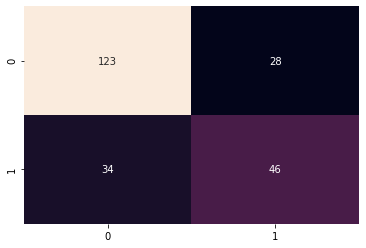

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

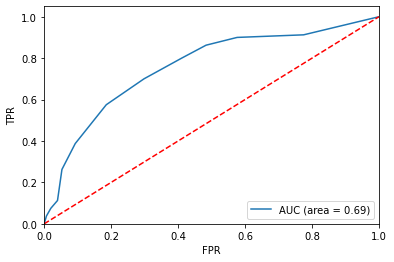

In [16]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

### Kaynaklar
* https://developers.google.com/machine-learning/crash-course
* https://tr.wikipedia.org/wiki/Destek_vekt%C3%B6r_makinesi
* https://www.udemy.com/course/python-ile-makine-ogrenmesi/
* https://www.veribilimiokulu.com/bootstrap/
* https://en.wikipedia.org/wiki/Gradient_boosting
* http://bilgisayarkavramlari.sadievrenseker.com/2008/12/01/svm-support-vector-machine-destekci-vektor-makinesi/